In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [52]:
df = pd.read_csv("Data/classification_data.csv")
df = df.drop("Unnamed: 0",axis=1)

In [53]:
df.head()

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90,Cluster
0,Patrick van Aanholt,nl NED,DF,Crystal Palace,eng Premier League,29.0,1990.0,22,20,"1,777",...,5.79,1.52,0.46,0.66,0.81,42.3,39.3,92.8,2.34,5
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,32.0,1987.0,33,33,"2,889",...,1.81,0.25,0.03,0.25,0.47,43.8,42.5,97.0,0.22,2
2,Pape Abou Cisse,sn SEN,DF,Saint-Étienne,fr Ligue 1,24.0,1995.0,14,14,"1,260",...,1.14,0.07,0.00,0.14,0.07,33.7,32.9,97.7,0.00,2
3,David Abraham,ar ARG,DF,Eint Frankfurt,de Bundesliga,34.0,1986.0,14,14,"1,222",...,3.24,0.66,0.00,0.22,0.00,34.8,33.4,96.0,0.59,2
4,Francesco Acerbi,it ITA,DF,Lazio,it Serie A,32.0,1988.0,32,32,"2,813",...,3.71,1.02,0.03,0.45,0.26,50.9,49.5,97.3,0.70,9


### Data preprocessing and cleaning

#### Like in the previous clustering we will be dropping the following columns:
- Player
- Nation
- Pos
- Squad
- Comp
- Age
- Born
- MP
- Starts
- Min
- 90s

In [54]:
df1 = df.drop(['Player', 'Nation', 'Squad', 'Comp', 'Born', 'MP',
       'Starts', 'Min', '90s'], axis=1)
df1.head()

,Pos,Age,Ast/90,npG/90,npG+A/90,xA/90,npxG/90,npxG+xA/90,Shots/90,SoTs/90,...,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90,Cluster
0,DF,29.0,0.05,0.00,0.05,0.04,0.06,0.10,0.91,0.30,...,5.79,1.52,0.46,0.66,0.81,42.3,39.3,92.8,2.34,5
1,DF,32.0,0.00,0.09,0.09,0.01,0.05,0.06,0.47,0.16,...,1.81,0.25,0.03,0.25,0.47,43.8,42.5,97.0,0.22,2
2,DF,24.0,0.00,0.00,0.00,0.00,0.08,0.09,0.93,0.21,...,1.14,0.07,0.00,0.14,0.07,33.7,32.9,97.7,0.00,2
3,DF,34.0,0.00,0.07,0.07,0.03,0.05,0.08,0.66,0.15,...,3.24,0.66,0.00,0.22,0.00,34.8,33.4,96.0,0.59,2
4,DF,32.0,0.03,0.00,0.03,0.03,0.03,0.06,0.26,0.00,...,3.71,1.02,0.03,0.45,0.26,50.9,49.5,97.3,0.70,9


### Let us check the number of values in each clusters

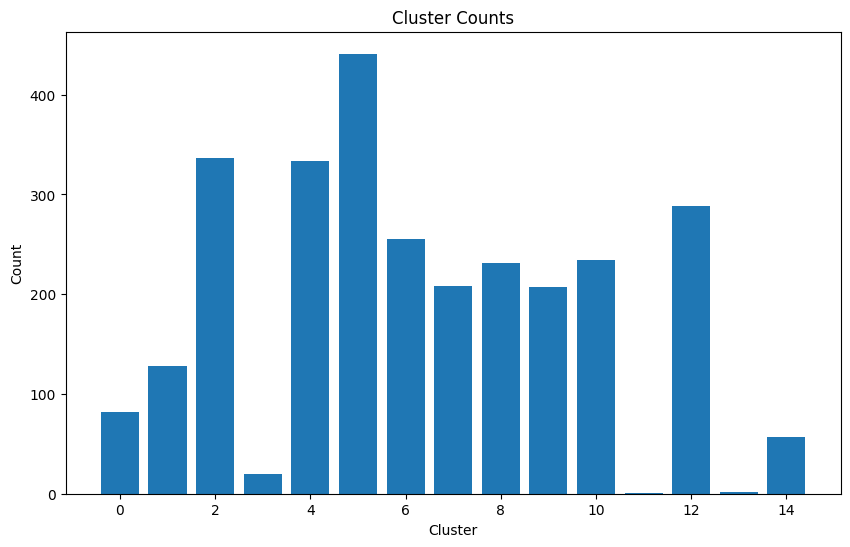

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df1 is already defined with the 'Cluster' column
# df1 = ...

# Calculate the cluster counts
cluster_counts = df1['Cluster'].value_counts().reset_index(name='Counts').sort_values(by='Counts')

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(cluster_counts['Cluster'], cluster_counts['Counts'])
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Cluster Counts')
plt.show()

In [56]:
label_encoder = LabelEncoder()

# Encode the "Pos" column
df1['Pos_Encoded'] = label_encoder.fit_transform(df1['Pos'])

encoded_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print("Encoded mapping:")
for key, value in encoded_mapping.items():
    print(f"{value}: {key}")

Encoded mapping:
0: DF
1: DF,FW
2: DF,MF
3: FW
4: FW,DF
5: FW,MF
6: GK
7: GK,MF
8: MF
9: MF,DF
10: MF,FW


In [57]:
df1 = df1.drop("Pos",axis=1)
df1.head()

,Age,Ast/90,npG/90,npG+A/90,xA/90,npxG/90,npxG+xA/90,Shots/90,SoTs/90,SoT%,...,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90,Cluster,Pos_Encoded
0,29.0,0.05,0.00,0.05,0.04,0.06,0.10,0.91,0.30,33.3,...,1.52,0.46,0.66,0.81,42.3,39.3,92.8,2.34,5,0
1,32.0,0.00,0.09,0.09,0.01,0.05,0.06,0.47,0.16,33.3,...,0.25,0.03,0.25,0.47,43.8,42.5,97.0,0.22,2,0
2,24.0,0.00,0.00,0.00,0.00,0.08,0.09,0.93,0.21,23.1,...,0.07,0.00,0.14,0.07,33.7,32.9,97.7,0.00,2,0
3,34.0,0.00,0.07,0.07,0.03,0.05,0.08,0.66,0.15,22.2,...,0.66,0.00,0.22,0.00,34.8,33.4,96.0,0.59,2,0
4,32.0,0.03,0.00,0.03,0.03,0.03,0.06,0.26,0.00,0.0,...,1.02,0.03,0.45,0.26,50.9,49.5,97.3,0.70,9,0


In [58]:
df1.replace('#DIV/0!', 0, inplace=True)
df1.fillna(0, inplace=True)
print(df1.isnull().sum())

Age                    0
Ast/90                 0
npG/90                 0
npG+A/90               0
xA/90                  0
                      ..
PassesReceived/90      0
PassRec%               0
ProgPassReceived/90    0
Cluster                0
Pos_Encoded            0
Length: 120, dtype: int64


### Scaling the dataset

In [59]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df1.drop(['Pos_Encoded','Cluster'], axis=1))
scaled_df = pd.DataFrame(scaled_data, columns=df1.drop(['Pos_Encoded','Cluster'], axis=1).columns)
scaled_df['Pos_Encoded'] = df1['Pos_Encoded']
scaled_df['Cluster'] = df1['Cluster']
scaled_df.head()

,Age,Ast/90,npG/90,npG+A/90,xA/90,npxG/90,npxG+xA/90,Shots/90,SoTs/90,SoT%,...,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90,Pos_Encoded,Cluster
0,0.690476,0.006112,0.000000,0.006112,0.007030,0.010657,0.017575,0.0455,0.030,0.333,...,0.0760,0.046,0.022000,0.027000,0.352500,0.327500,0.928,0.0468,0,5
1,0.761905,0.000000,0.043062,0.011002,0.001757,0.008881,0.010545,0.0235,0.016,0.333,...,0.0125,0.003,0.008333,0.015667,0.365000,0.354167,0.970,0.0044,0,2
2,0.571429,0.000000,0.000000,0.000000,0.000000,0.014210,0.015817,0.0465,0.021,0.231,...,0.0035,0.000,0.004667,0.002333,0.280833,0.274167,0.977,0.0000,0,2
3,0.809524,0.000000,0.033493,0.008557,0.005272,0.008881,0.014060,0.0330,0.015,0.222,...,0.0330,0.000,0.007333,0.000000,0.290000,0.278333,0.960,0.0118,0,2
4,0.761905,0.003667,0.000000,0.003667,0.005272,0.005329,0.010545,0.0130,0.000,0.000,...,0.0510,0.003,0.015000,0.008667,0.424167,0.412500,0.973,0.0140,0,9


In [60]:
from sklearn.model_selection import train_test_split

## separating train and test data

X = scaled_df.drop(['Cluster'],axis=1)
y = scaled_df['Cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

lr = LogisticRegression()
svc = SVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

models = [lr, svc, dt, rf]
scores = []

for m in models:
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)
    acc = accuracy_score(y_test, y_pred) * 100
    prec = precision_score(y_test, y_pred, average='macro') * 100
    rec = recall_score(y_test, y_pred, average='macro') * 100
    f1 = f1_score(y_test, y_pred, average='macro') * 100
    scores.append([acc, prec, rec, f1])

/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is 

In [63]:
scores_df = pd.DataFrame(columns=['Model'], data=['Logistic Regression', 'SVC', 'Decision Tree', 'Random Forest'])
scores_df = pd.concat([scores_df, pd.DataFrame(scores, columns=['Accuracy', 'Precision', 'Recall', 'F1'])], axis=1)
scores_df

,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,90.265487,81.975412,79.914251,80.598804
1,SVC,83.539823,77.988755,70.942016,72.498404
2,Decision Tree,84.247788,74.014687,75.584993,74.443746
3,Random Forest,91.327434,82.738199,84.501309,83.479256
